#### 1.11.3 AdaBoost
其核心拟合一系列的弱学习器（如比随机猜想好的模型，小决策树），反复修正数据集的权值。最终的预测结果通过对各个弱学习器投票的方式获得。在每次迭代过程中，对每个样本添加权值w1，w2，w3，…，wn。刚开始每个权值都相等，且都为1/N，因此第一步训练的弱学习器相当于在原始数据上进行训练。在每次成功的迭代当中，样本权值分别被修改，算法也就在加权的数据上进行。在每一步中，被分类错误的样本的权值会相对增加，相反的，被正确分类的权值会减少。因此在迭代过程中，很难预测正确的样本会受到更加的关注，后续的弱学习器会被强制的去针对这些样本。Adaboost可以用于解决分类和回归问题。

##### 1.11.3.1使用

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)  # n_estimators若学习器的数量

In [3]:
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()

0.9599673202614379

使用AdaBoost－SaMME展示非线性分类问题处理

In [4]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

In [5]:
# 构造数据
X1, y1 = make_gaussian_quantiles(cov=2.0,
                                 n_samples=200, 
                                 n_features=2, 
                                 n_classes=2, 
                                 random_state=1)
X２, y2 = make_gaussian_quantiles(mean=(3, 3), 
                                 cov=1.5, 
                                 n_samples=300, 
                                 n_classes=2, 
                                 random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2+1))

In [6]:
print(X.shape, y.shape)

(500, 2) (500,)


In [7]:
# 拟合提升树
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                         algorithm='SAMME',
                         n_estimators=200)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

Text(0.5, 1.0, 'Decision Boundary')

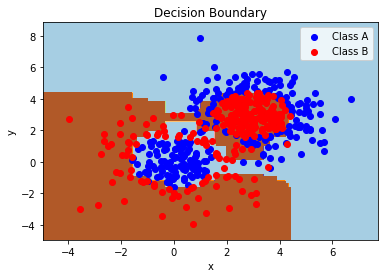

In [8]:
# 绘图
plot_color = 'br'
plot_step = 0.02
class_names = 'AB'

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

for i, n, c in zip(range(2), class_names, plot_color):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], 
                c=c, 
                cmap=plt.cm.Paired,
                label='Class %s'%n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

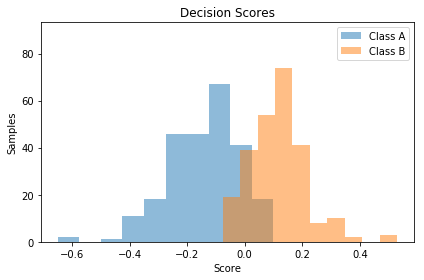

In [9]:
# 两类的分类情况
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())

for i, n, c in zip(range(2), class_names, plot_color):
    plt.hist(twoclass_output[y==i],
             bins=10,
             label='Class %s'%n,
             alpha=0.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2*1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.tight_layout()